In [135]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(nx.__version__)

3.3


In [209]:
def plot_graph_spring(network):
    ax = plt.figure(figsize=(10, 10)).add_subplot()
    layout = nx.spring_layout(network)
    node_sizes = np.zeros_like(network)
    for edge in network.edges:
        node_sizes[edge[0]] += 1
        node_sizes[edge[1]] += 1
    nx.draw(network, width=0.5, pos=layout, node_size=10*node_sizes, ax=ax)

def plot_graph_spectral(network):
    ax = plt.figure(figsize=(10, 10)).add_subplot()
    layout = nx.spring_layout(network)
    node_sizes = np.zeros_like(network)
    for edge in network.edges:
        node_sizes[edge[0]] += 1
        node_sizes[edge[1]] += 1
    nx.draw(network, width=0.5, pos=layout, node_size=10*node_sizes, ax=ax)

def plot_graph_random(network):
    ax = plt.figure(figsize=(10, 10)).add_subplot()
    layout = nx.random_layout(network)
    node_sizes = np.zeros_like(network)
    for edge in network.edges:
        node_sizes[edge[0]] += 1
        node_sizes[edge[1]] += 1
    nx.draw(network, width=0.5, pos=layout, node_size=10*node_sizes, ax=ax)

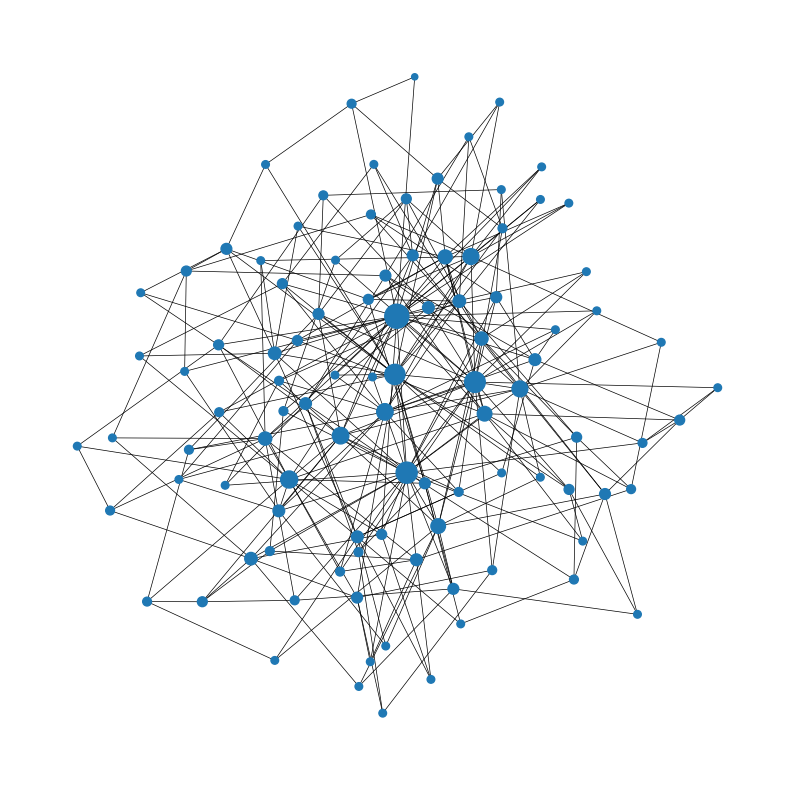

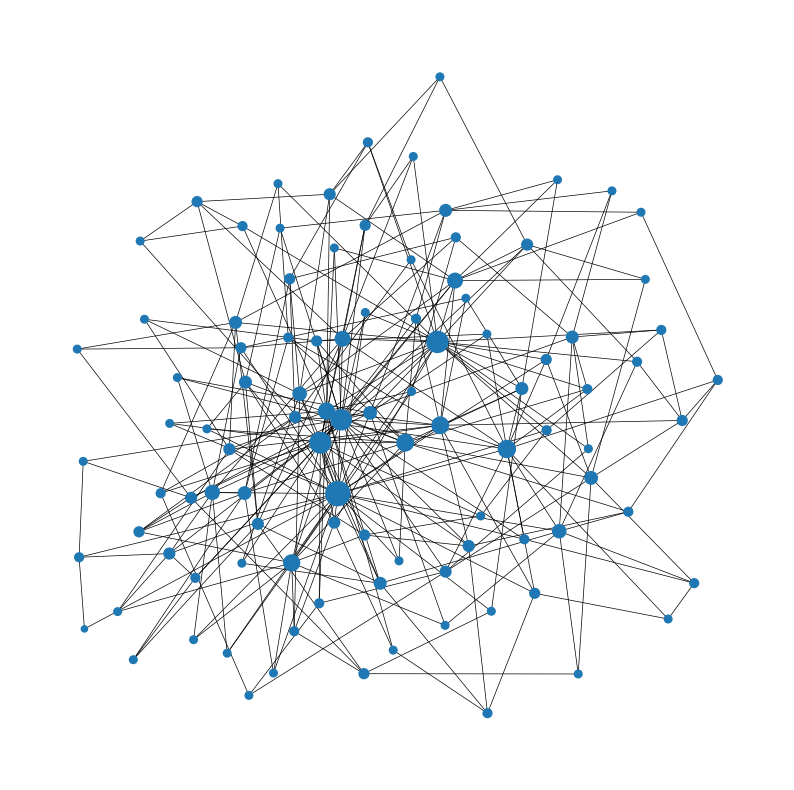

In [106]:
barabasiNet = nx.barabasi_albert_graph(100, 3)

plot_graph_spectral(barabasiNet)
plot_graph_spring(barabasiNet)

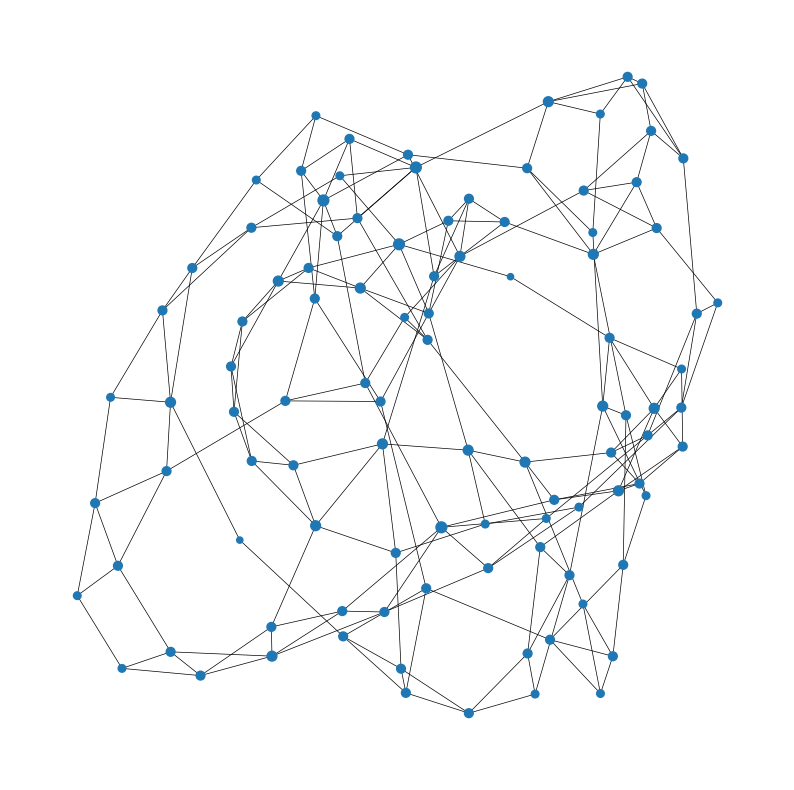

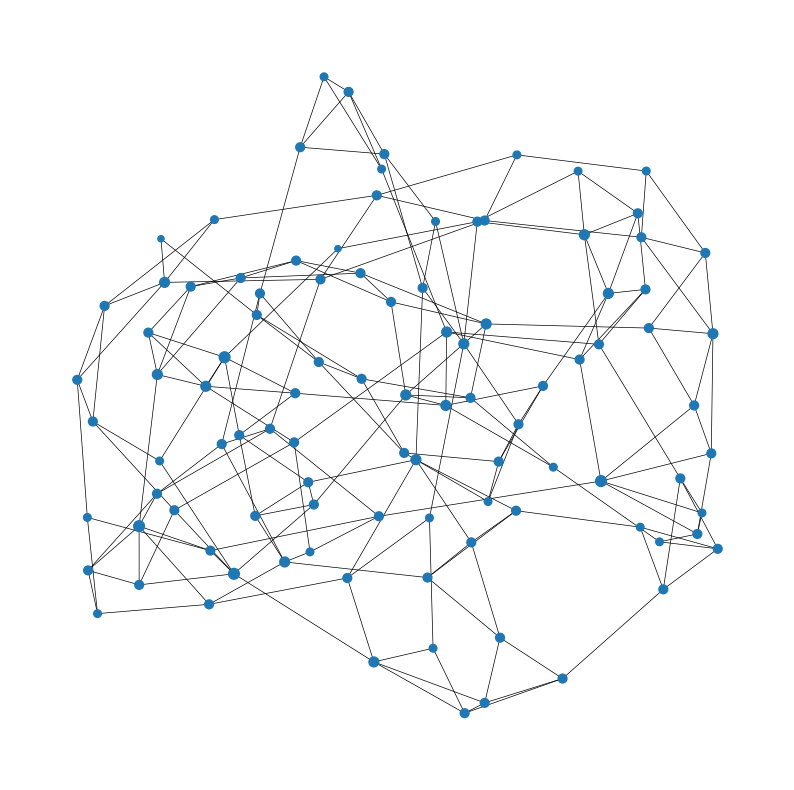

In [108]:
wattsStrogantz = nx.watts_strogatz_graph(100, 5, 0.2)
plot_graph_spectral(wattsStrogantz)
plot_graph_spring(wattsStrogantz)


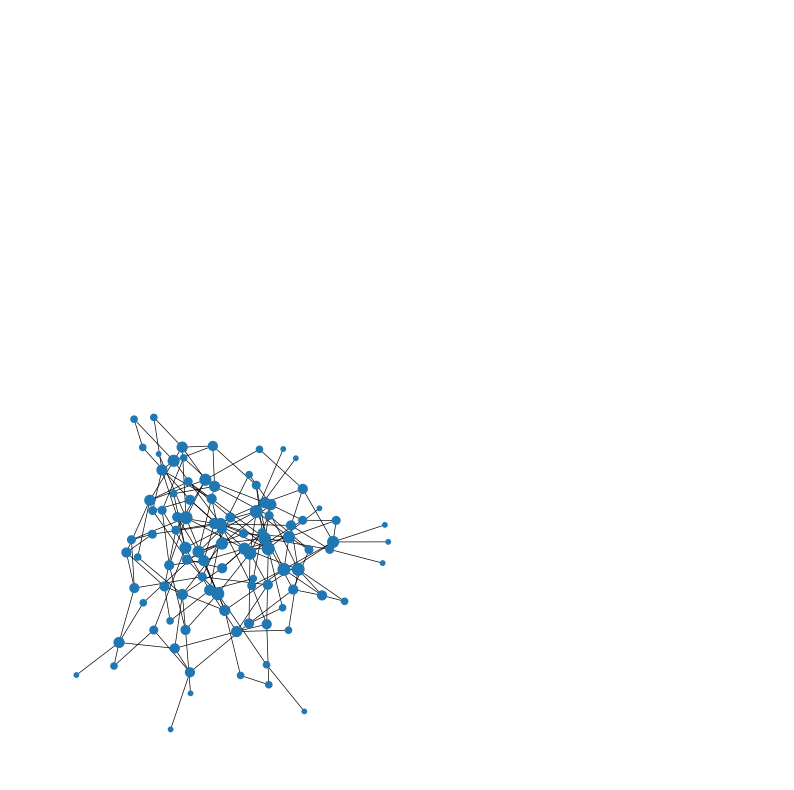

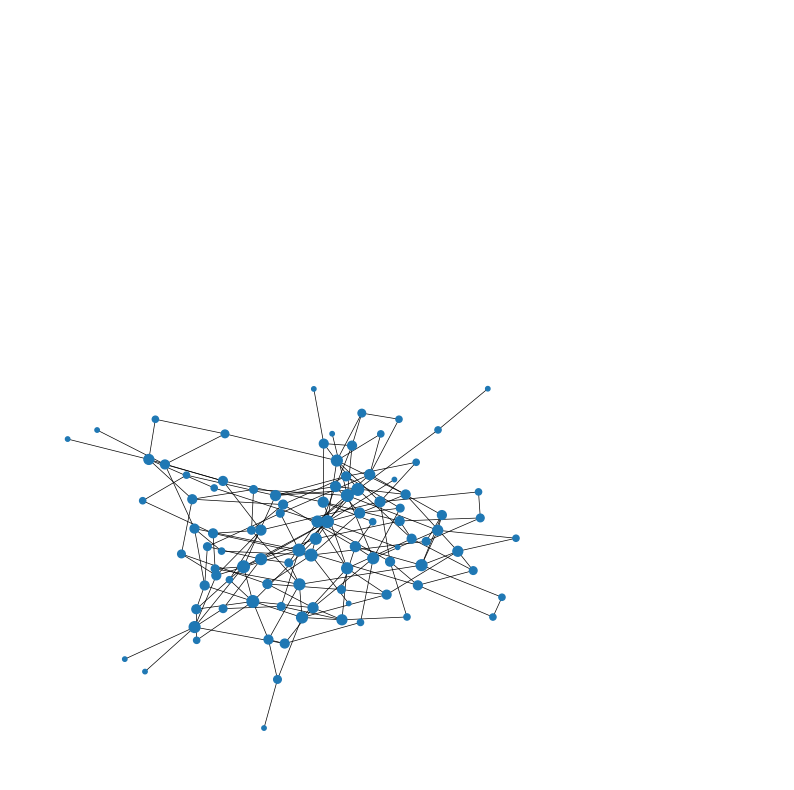

In [176]:
erdosReyni = nx.erdos_renyi_graph(100, 0.04)
plot_graph_spectral(erdosReyni)
plot_graph_spring(erdosReyni)
nx.write_adjlist(erdosReyni, "adjlist.csv")

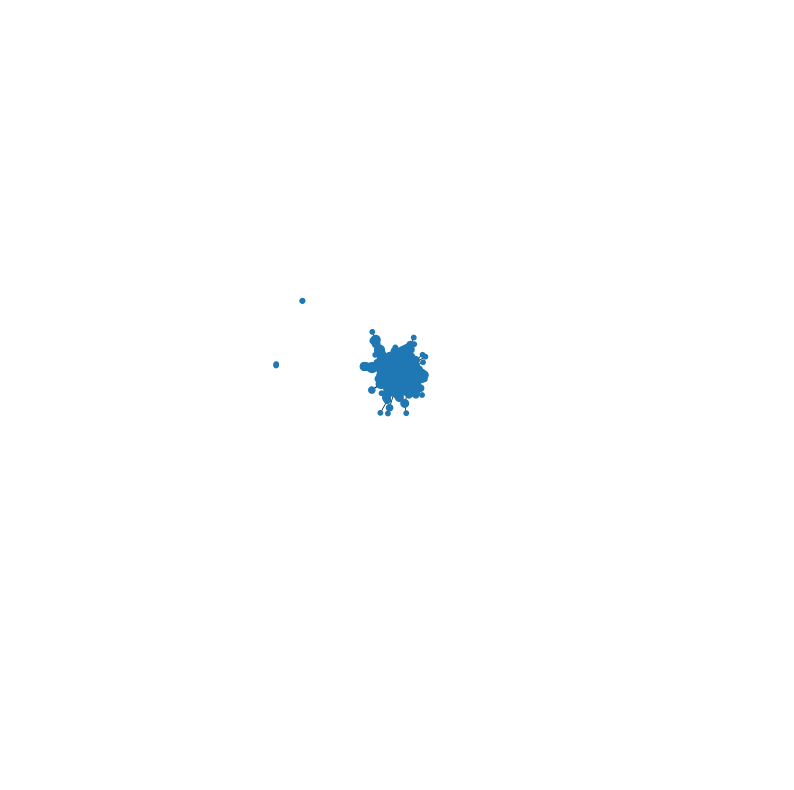

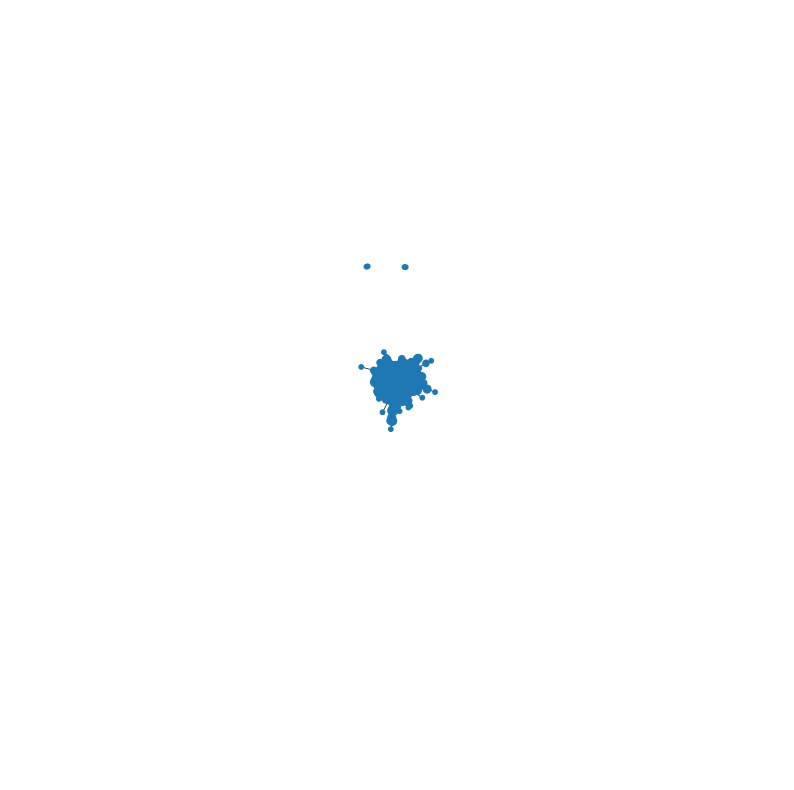

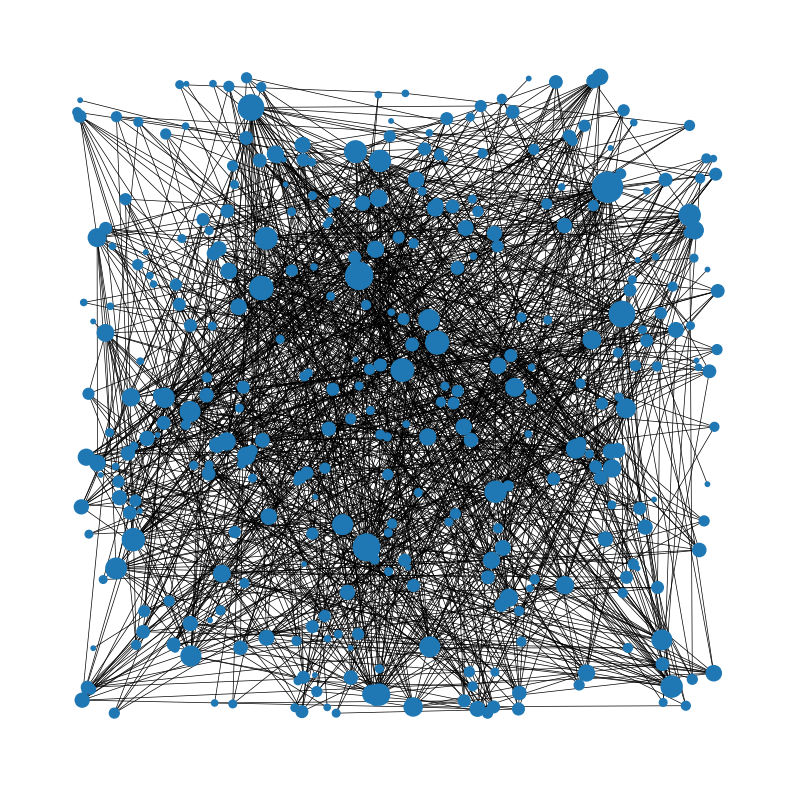

In [210]:
dataframe = pd.read_csv("transmission_network.csv", sep=";")
dataframe = dataframe.drop(columns=dataframe.columns[0])
# print(dataframe)
rename_dict = {}
for old, new in zip(dataframe.columns, range(374)):
    rename_dict[old] = new
dataframe = dataframe.rename(columns=rename_dict)
graph = nx.from_pandas_adjacency(dataframe)
plot_graph_spectral(graph)
plot_graph_spring(graph)
plot_graph_random(graph)